In [276]:
# programmer: brandon williams
# school: university of virginia
# email: bpw8dd@virginia.edu

In [277]:
# acquire data from spotify API (spotipy)

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

import pandas as pd

In [279]:
USERNAME = 'your-username'
CLIENT_ID='your-client-id'
CLIENT_SECRET = 'your-client-secret'
REDIRECT_URI = 'your-redirect-uri'
SCOPE = 'your-scope'

In [280]:
client_credentials_manager = SpotifyClientCredentials(CLIENT_ID, CLIENT_SECRET)

In [281]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace = True

In [282]:
token = util.prompt_for_user_token(USERNAME, SCOPE, CLIENT_ID, CLIENT_SECRET, REDIRECT_URI)

In [284]:
# source: https://github.com/plamere/spotipy/blob/master/examples/show_my_saved_tracks.py

sp_object = spotipy.Spotify(auth=token)
tids = []
for i in range(6):
    # offset param returns index of first track to begin with
    results = sp_object.current_user_saved_tracks(limit=50, offset=i*50) 
    for item in results['items']:
        tid = item['track']['id']
        tids.append(tid)

In [285]:
# audio_features has processing limit of 100; process three lists of 100 track ids
audio_features_1 = sp_object.audio_features(tracks=tids[:100])
audio_features_2 = sp_object.audio_features(tracks=tids[100:200])
audio_features_3 = sp_object.audio_features(tracks=tids[200:])

audio_features = [audio_features_1, audio_features_2, audio_features_3]

In [287]:
# https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

# extract relevant data for pandas dataframe
data = []
for audio_feature in audio_features:
    for feature in audio_feature:
        tid = feature['id']
        track = sp_object.track(tid)
        name = track['name']
        artist = track['artists'][0]['name']
        danceability = feature['danceability']
        energy = feature['energy']
        loudness = feature['loudness']
        acousticness = feature['acousticness']
        valence = feature['valence']
        data.append([name, artist, tid, danceability, energy, loudness, acousticness, valence])

In [288]:
df = pd.DataFrame(data, columns = ['name', 'artist', 'track_id', 'danceability', 'energy', 'loudness', 'acousticness', 'valence'])

In [290]:
# Save to CSV file to avoid unncessary calls to spotify API
# df.to_csv('spotify_data.csv')

In [4]:
# source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

# normalization of loudness values (want values to lie in range of 0 to 1)
from sklearn import preprocessing
import numpy as np

df = pd.read_csv('spotify_data.csv')
loudness = df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
loudness_scaled = np.round_(loudness_scaled, decimals = 3)

df.loudness = loudness_scaled

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [234]:
# No "correct" clustering, open-ended, have to physically look at the data corresponding to each cluster to properly label
# each input is a vector in 5-dimensional space --> find a representative value for each cluster
# # K-means clustering?
    # Source: DSFS: Joel Grus 
    # Iterative algorithm that usually finds a good clustering.
    # 1) start with a set of k-means, points in 5-dimensional space
    # 2) Assign each point to the mean to which it is the closest
    # 3) If no point's assignment has changed, stop and keep the clusters
    # 4) If some point's assignment has changed, recompute the means and return to step 2

    # So how do we go about choosing k?
        # One way to choose k is to plot the sum of squared errors (between each point and the mean of its cluster) as a function of k and looking at where the graph "bend"
        # DSFS recommends using sklearn.cluster for invesetigating different clustering algorithms

In [293]:
# exploring data
df

,name,artist,track_id,danceability,energy,loudness,acousticness,valence
0,Sunday Morning,Maroon 5,5qII2n90lVdPDcgXEEVHNy,0.608,0.768,0.751,0.091300,0.8090
1,"Telescope (feat. Anine, Polo G & Swarmz)",The Plug,7f3lIYiuYuKngnz0Mwt54R,0.815,0.520,0.479,0.024000,0.3980
2,Benihana (feat. Kodak Black),Lil Durk,7ihTrFX15onWzNwCHCD2w2,0.775,0.679,0.668,0.071000,0.4940
3,Lost in My Mind,RÜFÜS DU SOL,2LcQebtolx6SwZS4zeHWWt,0.575,0.827,0.725,0.009620,0.2860
4,Shameless,The Weeknd,6C6fHTuFUxVtJpBOOaMvJr,0.603,0.563,0.527,0.147000,0.2340
5,Feel No Ways,Drake,3cjF2OFRmip8spwZYQRKxP,0.588,0.674,0.616,0.031900,0.1980
6,Childs Play,Drake,3NxAG2ni1lLa8RKL6a0INc,0.745,0.473,0.315,0.017000,0.2960
7,Too Good,Drake,3BtuIIrQlkujKPuWF2B85z,0.793,0.653,0.562,0.048400,0.3930
8,Controlla,Drake,3O8NlPh2LByMU9lSRSHedm,0.611,0.468,0.327,0.078100,0.3490
9,LOVE. FEAT. ZACARI.,Kendrick Lamar,6PGoSes0D9eUDeeAafB2As,0.800,0.585,0.597,0.264000,0.7790


In [6]:
track_features = df.copy()
track_features = track_features.drop(['name', 'artist', 'track_id'], axis=1)

In [7]:
# source: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
# source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# k-means++, variant of k-means, improves clustering results with a more clever seeding of the initial cluster centers
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters = i, init='k-means++',
        n_init = 10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(track_features)
    distortions.append(km.inertia_)

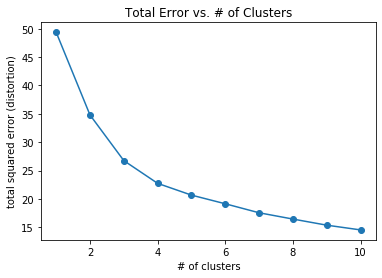

In [53]:
# choosing k-- elbow method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('total squared error (distortion)')
plt.title('Total Error vs. # of Clusters')
plt.show()

In [9]:
km = KMeans(n_clusters=4)
km.fit(track_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# dimensionality reduction technique -- principle component analysis 
from sklearn.decomposition import PCA
output_km = km.predict(track_features)
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(track_features)

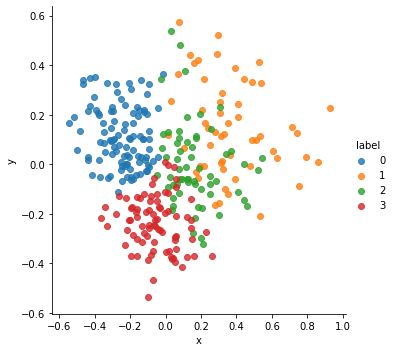

In [11]:
# cluster visualization
import seaborn as sns

labeled = pd.DataFrame(principal_components)
labeled['label'] = output_km
labeled.columns = ['x', 'y', 'label']

cluster = sns.lmplot(data=labeled, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [14]:
df['label'] = output_km

In [20]:
columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

In [30]:
# cheerful/energetic mood
for column in columns:
    print(column, df[df['label'] == 0][column].mean())
(df[df['label'] == 0].tail(10))

danceability 0.6688921568627452
energy 0.7775686274509802
loudness 0.7512549019607843
acousticness 0.07714819607843136
valence 0.6800784313725486


,name,artist,track_id,danceability,energy,loudness,acousticness,valence,label
271,Basket Case,Green Day,6L89mwZXSOwYl76YXfX13s,0.442,0.943,0.897,0.002930,0.781,0
273,Bad Habit,The Kooks,3huV7eiNpaQlCB3LbZi9bB,0.733,0.882,0.825,0.051000,0.854,0
276,The Anthem,Good Charlotte,0BRHnOFm6sjxN1i9LJrUDu,0.494,0.939,0.903,0.006660,0.893,0
277,Another Day in Paradise,Quinn XCII,4gHSezW5CHZCvjAUjF2pd5,0.652,0.802,0.745,0.161000,0.559,0
280,All Time Low,Jon Bellion,0SuLAslEMFZAXf0SwY7syi,0.617,0.567,0.826,0.058400,0.505,0
281,All The Small Things,blink-182,7yCPwWs66K8Ba5lFuU2bcx,0.439,0.891,0.784,0.012200,0.695,0
283,Addicted,Simple Plan,1B8MHa0NveCF1ViBEOZWO5,0.522,0.751,0.734,0.000491,0.605,0
289,Beach House,The Chainsmokers,2bQhVQbV7VBzSOPo8mbkUR,0.400,0.838,0.804,0.174000,0.533,0
295,When I'm Down,Whethan,556l9P7WVZVyYUBjT1YFTT,0.827,0.769,0.835,0.209000,0.491,0
298,Alien Boy,Oliver Tree,1gGhqfs2pDTOI30AEXMXrn,0.803,0.599,0.755,0.111000,0.484,0


In [31]:
# romantic 
for column in columns:
    print(column, df[df['label'] == 1][column].mean())
df[df['label'] == 1].tail(20)

danceability 0.6709999999999999
energy 0.5117818181818183
loudness 0.5455454545454546
acousticness 0.5438181818181821
valence 0.411530909090909


,name,artist,track_id,danceability,energy,loudness,acousticness,valence,label
213,Gravity,John Mayer,3SktMqZmo3M9zbB7oKMIF7,0.764,0.326,0.414,0.731,0.237,1
214,Gooey,Glass Animals,1gk3FhAV07q9Jg77UxnVjX,0.487,0.369,0.157,0.736,0.106,1
215,Goodbye My Lover,James Blunt,6gxycjJNMgmAyfzUXBN80P,0.432,0.261,0.217,0.953,0.273,1
216,Good Nights (feat. Mascolo),Whethan,08Kj0lvbsqAxzeUOBYZRL6,0.849,0.483,0.614,0.443,0.282,1
218,Go Fuck Yourself,Two Feet,4NZrZgrRoR4GwR7flWOXRI,0.765,0.327,0.548,0.571,0.292,1
224,The General,Dispatch,6n6EXIwLtNwe4u4CFzENYm,0.541,0.675,0.685,0.446,0.686,1
227,I Dare You,The xx,044qU7kwVZaDwzWnRsmVVL,0.752,0.543,0.442,0.623,0.282,1
228,Free,Kidswaste,5413LFXLYAJS85VKs6H6ag,0.600,0.508,0.385,0.910,0.105,1
231,Firestone (feat. Conrad Sewell),Kygo,1I8tHoNBFTuoJAlh4hfVVE,0.486,0.652,0.606,0.408,0.391,1
242,Eastside (with Halsey & Khalid),benny blanco,0d2iYfpKoM0QCKvcLCkBao,0.560,0.680,0.575,0.555,0.319,1


In [36]:
# lyrical/Chill mood
for column in columns:
    print(column, df[df['label'] == 2][column].mean())
df[df['label'] == 2].tail(38)

danceability 0.7334918032786885
energy 0.5301639344262296
loudness 0.48198360655737704
acousticness 0.12291249180327872
valence 0.3904803278688525


,name,artist,track_id,danceability,energy,loudness,acousticness,valence,label
97,Jumper - 1998 Edit,Third Eye Blind,3354J49VpkbZJho7Ztdzpw,0.599,0.543,0.461,0.012900,0.624,2
99,Came For The Low,ZHU,36LQYp5FNsuT5voIO9bdfZ,0.794,0.531,0.637,0.018400,0.130,2
108,Woah,Lil Baby,02RCbjb9czvQKNGBmEmWob,0.883,0.599,0.727,0.017700,0.413,2
123,Blueberry Faygo,Lil Mosey,6wJYhPfqk3KGhHRG76WzOh,0.774,0.554,0.556,0.207000,0.349,2
128,Heartless (feat. Mustard),Polo G,028JxheELfIvvY4zBXuMjw,0.776,0.640,0.546,0.150000,0.326,2
133,beibs in the trap,Travis Scott,0ESJlaM8CE1jRWaNtwSNj8,0.743,0.571,0.691,0.240000,0.495,2
136,romance361,iann dior,33BCQDhwZyiudb8Mud33tb,0.713,0.632,0.573,0.058900,0.373,2
138,Perfect,Yung Pinch,1JmEymqQwLXvCg3sJ7gz0n,0.680,0.542,0.488,0.260000,0.274,2
142,birthday party,916frosty,0LiWeqtbRvTJLZ3tcGe96p,0.664,0.621,0.513,0.264000,0.239,2
143,Round n Round,Landon Cube,5497yyygT4ijwXH4swmQ86,0.581,0.474,0.365,0.066600,0.185,2


In [39]:
# sadboy mood
for column in columns:
    print(column, df[df['label'] == 3][column].mean())
df[df['label'] == 3].tail(7)

danceability 0.585658536585366
energy 0.7605243902439024
loudness 0.7536219512195123
acousticness 0.08333235853658537
valence 0.2851012195121952


,name,artist,track_id,danceability,energy,loudness,acousticness,valence,label
275,Audio,Sia,60jFTpfSeyc2oRENnaHlrw,0.365,0.692,0.797,0.192000,0.372,3
278,Anna Sun,WALK THE MOON,3e0yTP5trHBBVvV32jwXqF,0.472,0.844,0.653,0.001730,0.340,3
284,WIEE (feat. Mesto),Martin Garrix,0Y2QWrhPh6ATyaWYT0QLIR,0.520,0.835,0.566,0.278000,0.373,3
291,I'll Be Fine,Juice WRLD,0INehbMZOFPnaPBAjK97i3,0.523,0.678,0.690,0.000616,0.277,3
293,Missin You Crazy,Russ,4ve2uzqdwnHr20G5YgMMqr,0.716,0.729,0.672,0.099100,0.276,3
297,Hide (feat. Seezyn),Juice WRLD,6rz0dTA0PdhXImFV5EjM0w,0.715,0.639,0.766,0.062200,0.151,3
299,Love Is Hell (feat. Trippie Redd),Phora,2Tn4XArLhjrZEhBKlAle0j,0.662,0.784,0.610,0.011300,0.107,3


In [50]:
# training random forest classifier model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = track_features
y = output_km

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.95


In [52]:
# examining features important for predicting mood
list(zip(track_features[track_features.columns], model.feature_importances_))

[('danceability', 0.06505480459179994),
 ('energy', 0.18547989191190242),
 ('loudness', 0.16989394585317694),
 ('acousticness', 0.25628915827351006),
 ('valence', 0.3232821993696106)]

In [51]:
# source: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn.metrics import confusion_matrix, classification_report


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[27  0  1  0]
 [ 1  8  0  0]
 [ 1  0  9  0]
 [ 0  0  0 13]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       1.00      0.89      0.94         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        13

   micro avg       0.95      0.95      0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60



